<a href="https://colab.research.google.com/github/Akriti789-abc/Nucleosome-Positioning-Fluctuation/blob/main/Nucleosome_Positioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install --upgrade pip
!pip install numpy cython

!pip install pybedtools

!pip install pandas matplotlib seaborn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 89.0 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 100.8 MB/s  0:00:00
  Created wheel for pybedtools: filename=pybedtools-0.12.0-cp312-cp312-linux_x86_64.whl size=14340828 sha256=0791bf6fd5ce26d89fe79ca52435098538d85b0f8691465921bb4d3563f0d80e
  Stored in directory: /root/.cache/pip/wheels/ac/38/f2/960d79e44a92afc0d34a4727c856ce0149ac23c3dcda174356
Successfully built pybedtools
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pybedtools]


In [29]:
import os
print("Current files in this directory:")
print(os.listdir())

from google.colab import files
print(" Upload your lhy and nucleosome.txt.gz files:")
files.upload()

print("\nFiles after upload:")
print(os.listdir())


Current files in this directory:
['.config', 'lhy2.txt', 'GSE274066_MNase_processed_data (1).txt.gz', 'README.md', 'lhy.txt', 'sample_data']
 Upload your lhy and nucleosome.txt.gz files:


Saving lhy2.txt to lhy2 (1).txt

Files after upload:
['.config', 'lhy2 (1).txt', 'lhy2.txt', 'GSE274066_MNase_processed_data (1).txt.gz', 'README.md', 'lhy.txt', 'sample_data']


In [30]:
import pandas as pd

file_path = 'lhy2.txt'

# Load while skipping lines starting with 'track' or '#'
gene = pd.read_csv(
    file_path,
    sep='\t',
    comment='t',  # this skips any line starting with 't', i.e., 'track'
    header=None,
    names=['chrom', 'start', 'end', 'name', 'score', 'strand']
)

# Check data
print(gene.head())
print(gene.shape)




   chrom    start      end               name  score strand
0      5  3172271  3172701  AT5G10130.1.exon1      0      -
1      5  3171265  3171888  AT5G10130.1.exon2      0      -
(2, 6)


In [31]:
import pandas as pd

nucleo_file = 'GSE274066_MNase_processed_data (1).txt.gz'

# Load nucleosome positioning data
nucleo = pd.read_csv(nucleo_file, sep='\t')

# Show first few rows and basic info
print(nucleo.head())
print("\nShape:", nucleo.shape)
print("\nColumns:", nucleo.columns.tolist())


  genotype treatment  bio_rep  fragment_length  leftmost_coord  \
0     vrn1      cold        1              100         3172382   
1     vrn1      cold        1              100         3172383   
2     vrn1      cold        1              100         3172386   
3     vrn1      cold        1              100         3172387   
4     vrn1      cold        1              100         3172388   

   rightmost_coord  FLC_read_freq  
0          3172482       0.000014  
1          3172483       0.000008  
2          3172486       0.000006  
3          3172487       0.000002  
4          3172488       0.000002  

Shape: (1039765, 7)

Columns: ['genotype', 'treatment', 'bio_rep', 'fragment_length', 'leftmost_coord', 'rightmost_coord', 'FLC_read_freq']


Number of nucleosome fragments around LHY: 135400


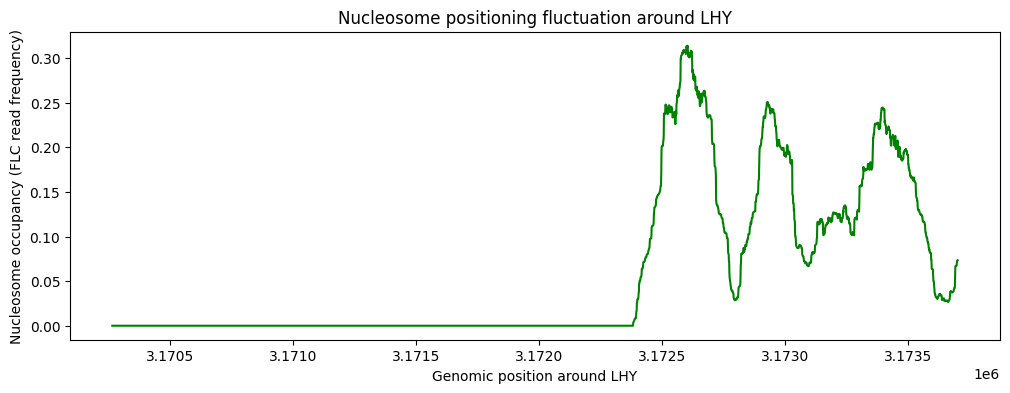

In [32]:
import numpy as np
import matplotlib.pyplot as plt


start = gene['start'].min() - 1000
end = gene['end'].max() + 1000

# 2️⃣ Filter nucleosomes overlapping this region
nucleo_gene = nucleo[(nucleo['leftmost_coord'] <= end) &
                     (nucleo['rightmost_coord'] >= start)]
print("Number of nucleosome fragments around LHY:", nucleo_gene.shape[0])

# 3️⃣ Create coverage vector
positions = np.arange(start, end+1)
coverage = np.zeros(len(positions))

for _, row in nucleo_gene.iterrows():
    idx_start = max(row['leftmost_coord'] - start, 0)
    idx_end = min(row['rightmost_coord'] - start + 1, len(positions))
    coverage[idx_start:idx_end] += row['FLC_read_freq']

# 4️⃣ Plot nucleosome occupancy
plt.figure(figsize=(12,4))
plt.plot(positions, coverage, color='green')
plt.xlabel('Genomic position around LHY')
plt.ylabel('Nucleosome occupancy (FLC read frequency)')
plt.title('Nucleosome positioning fluctuation around LHY')
plt.show()
